In [102]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [103]:
df=pd.read_csv("data - data.csv")#Reading the csv format file
df.head() #gives the first 5 rows in the dataset.

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,y
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [104]:
df.dtypes

X1      object
X2     float64
X3      object
X4     float64
X5      object
X6     float64
X7      object
X8       int64
X9      object
X10     object
X11     object
X12    float64
y      float64
dtype: object

In [105]:
column_names = [
    "Product_ID",
    "Purchased_price",
    "Product_Type",
    "Product_Properties",
    "Product_Category",
    "Product_Quantity",
    "Store_ID",
    "Store_Establishment_Year",
    "Store_Size",
    "Store_Location_Tier",
    "Store_Type",
    "Sales_Revenue",
    "Sales_Price"
]
df.columns = column_names
df.head()

,Product_ID,Purchased_price,Product_Type,Product_Properties,Product_Category,Product_Quantity,Store_ID,Store_Establishment_Year,Store_Size,Store_Location_Tier,Store_Type,Sales_Revenue,Sales_Price
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


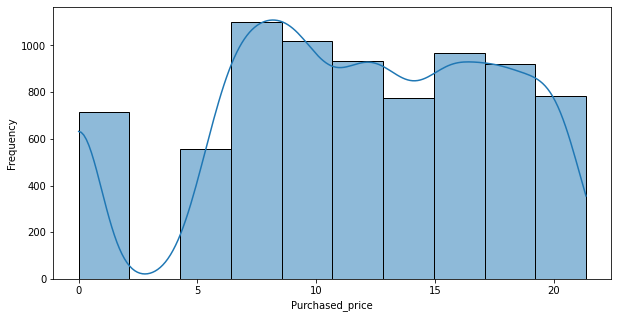

In [106]:
plt.figure(figsize=(10,5))
sns.histplot(df.Purchased_price,bins=10,kde=True)
plt.ylabel("Frequency")
plt.show()
# In this chart, i have shown how the price is being distributed. The 5 to 10 purchase price is more than anything else in here. 

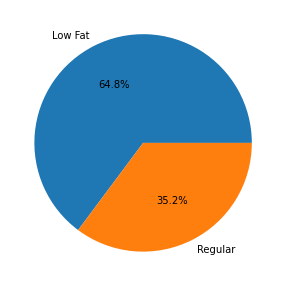

In [107]:
plt.figure(figsize=(10,5))
df.groupby(df.Product_Type)["Sales_Price"].sum().plot(kind="pie",autopct="%1.1f%%")#colors=sns.color_palette('pastel')
plt.ylabel("")
plt.show()
# This chart indicates what type of the product available and which type has more contribution. From this chart it is clearly visible that the Low fat product has more weightage than Regular in sales.

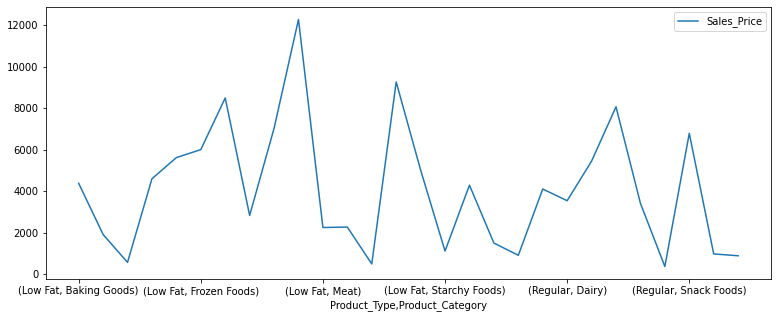

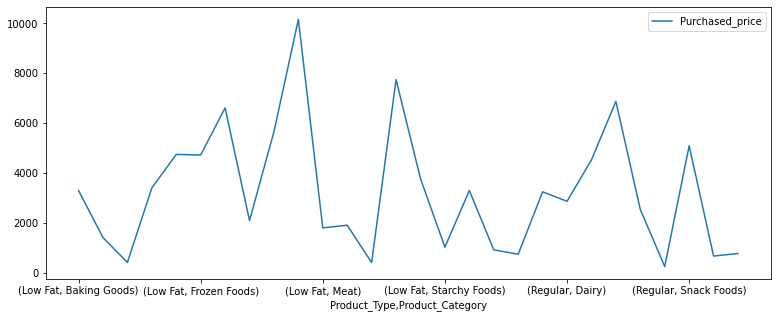

In [108]:
group = df.groupby(["Product_Type","Product_Category"])[["Sales_Price"]].sum().plot(kind="line",figsize=(13,5))
group = df.groupby(["Product_Type","Product_Category"])[["Purchased_price"]].sum().plot(kind="line",figsize=(13,5))
# In this plot i wanted to explain the Total Sales price wrt to the product type and their sub types how much the sales price we need to increase by the purchase price to increase the revenue.

<Figure size 1080x576 with 0 Axes>

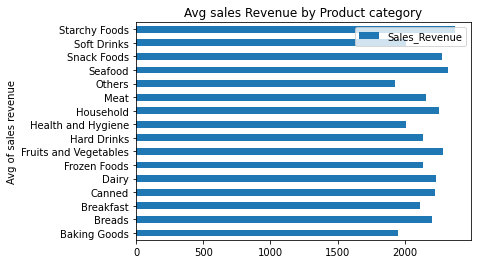

In [109]:
plt.figure(figsize=(15,8))
pd.DataFrame(df["Sales_Revenue"].groupby(df.Product_Category).mean()).plot(kind="barh")
plt.ylabel("Avg of sales revenue")
plt.title("Avg sales Revenue by Product category")
plt.show()
# This chart depicts the average revenue generated by each of the product category.

<AxesSubplot:>

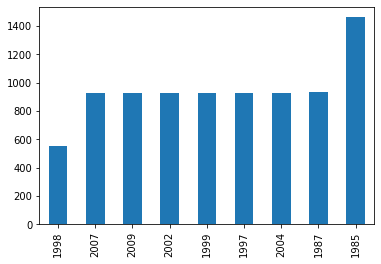

In [110]:
df.Store_Establishment_Year.value_counts(sort=True,ascending=True).plot(kind="bar")
# In here we are depicteing that the store establishment was highest in 1985 and then it got decreased in 1998 and again increased in 1999.Since, then has been in Constant. 

In [111]:
df =df.dropna() #Drop null vlaues

In [112]:
df.shape

(5364, 13)

In [113]:
df = df.drop(columns=["Product_ID","Product_Properties","Store_ID","Store_Establishment_Year","Store_Size"])

In [114]:
df.shape

(5364, 8)

In [115]:
df.dtypes

Purchased_price        float64
Product_Type            object
Product_Category        object
Product_Quantity       float64
Store_Location_Tier     object
Store_Type              object
Sales_Revenue          float64
Sales_Price            float64
dtype: object

<AxesSubplot:xlabel='Purchased_price'>

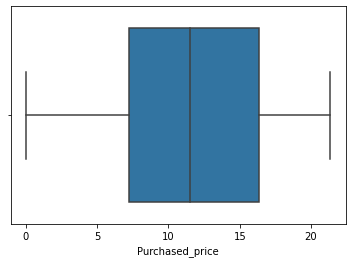

In [116]:
sns.boxplot(x=df.Purchased_price)

<AxesSubplot:xlabel='Product_Quantity'>

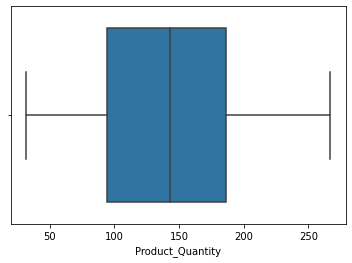

In [117]:
sns.boxplot(x=df.Product_Quantity)

<AxesSubplot:xlabel='Sales_Revenue'>

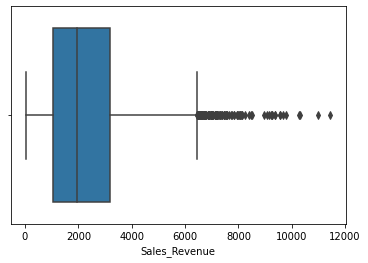

In [118]:
sns.boxplot(x=df.Sales_Revenue)

<AxesSubplot:xlabel='Sales_Price'>

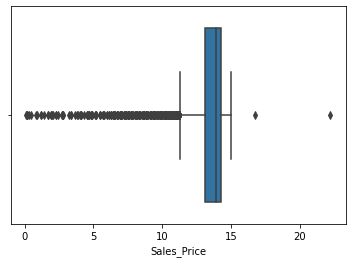

In [119]:
sns.boxplot(x='Sales_Price',data=df)

In [120]:
# Remove outliers
df_num=df.select_dtypes(include="number")
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR


In [121]:
df = df[~((df_num<lower_bound)|(df_num>upper_bound)).any(axis=1)]

<AxesSubplot:xlabel='Sales_Revenue'>

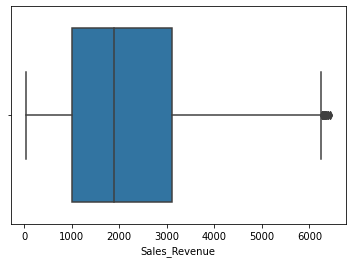

In [122]:
sns.boxplot(x=df.Sales_Revenue)

<AxesSubplot:xlabel='Sales_Price'>

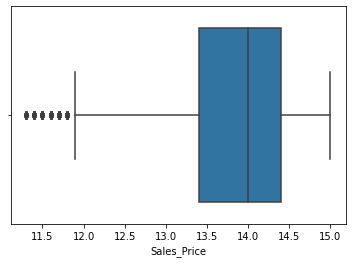

In [123]:
sns.boxplot(x='Sales_Price',data=df)

In [124]:
df_num=df.select_dtypes(include="number")
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [125]:
df = df[~((df_num<lower_bound)|(df_num>upper_bound)).any(axis=1)]

<AxesSubplot:xlabel='Sales_Revenue'>

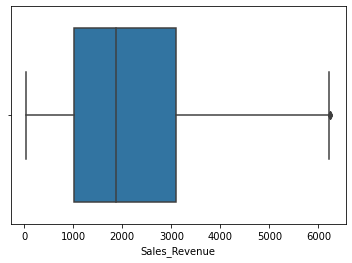

In [126]:
sns.boxplot(x=df.Sales_Revenue)

<AxesSubplot:xlabel='Sales_Price'>

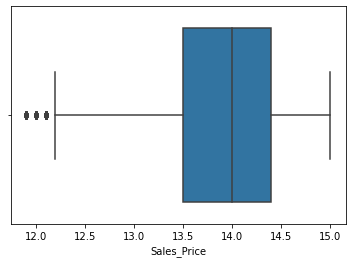

In [127]:
sns.boxplot(x='Sales_Price',data=df)

In [128]:
df_num = df.select_dtypes(include="number")
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 -Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3+1.5*IQR

In [129]:
df = df[~((df_num<lower_bound)|(df_num>upper_bound)).any(axis=1)]

<AxesSubplot:xlabel='Sales_Revenue'>

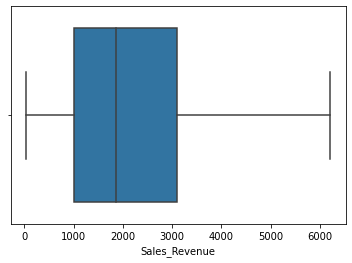

In [130]:
sns.boxplot(x=df.Sales_Revenue)

<AxesSubplot:xlabel='Sales_Price'>

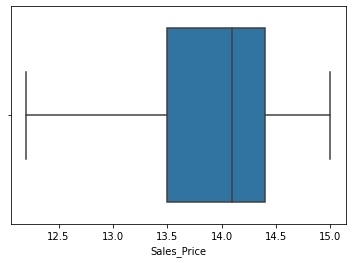

In [131]:
sns.boxplot(x='Sales_Price',data=df)

In [132]:
df.shape

(4581, 8)

In [133]:
#drop the label column from df and store features in x and store target label it in y. 
x = df.drop("Sales_Price",axis=1)
y=df.Sales_Price
x.head()

,Purchased_price,Product_Type,Product_Category,Product_Quantity,Store_Location_Tier,Store_Type,Sales_Revenue
1,5.92,Regular,Soft Drinks,48.3,Tier 2,Supermarket Type2,443.4228
2,17.50,Low Fat,Meat,141.6,Tier 2,Supermarket Type1,2097.2700
4,8.93,Low Fat,Household,53.9,Tier 3,Supermarket Type1,994.7052
10,11.80,Low Fat,Fruits and Vegetables,45.5,Tier 2,Supermarket Type1,1516.0266
11,18.50,Regular,Dairy,144.1,Tier1,Supermarket Type1,2187.1530


In [134]:
scaler = MinMaxScaler()

In [135]:
x_num = df.select_dtypes("number")
x_num_scaled = scaler.fit_transform(x_num)

In [136]:
x_cat = df.select_dtypes("object")
x_cat_encoded = pd.get_dummies(x_cat,drop_first=False,dtype=int)

In [137]:
x_num_scaled = pd.DataFrame(x_num_scaled,columns=x_num.columns,index=x_num.index)
x_num_scaled

,Purchased_price,Product_Quantity,Sales_Revenue,Sales_Price
1,0.277283,0.071368,0.066214,0.750000
2,0.819672,0.467715,0.334088,0.821429
4,0.418267,0.095157,0.155505,0.678571
10,0.552693,0.059473,0.239944,0.750000
11,0.866511,0.478335,0.348647,0.750000
...,...,...,...,...
8516,0.871194,0.115973,0.133506,0.857143
8517,0.971897,0.625743,0.578885,0.357143
8518,0.321546,0.777400,0.444408,0.678571
8521,0.337705,0.304163,0.293325,0.714286


In [138]:
X = pd.concat([x_num_scaled,x_cat_encoded],axis=1) #combine the Scaled columns.

In [139]:
X.shape,x_num_scaled.shape,x_cat_encoded.shape

((4581, 29), (4581, 4), (4581, 25))

In [140]:
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)

Purchased_price                           0
Product_Quantity                          0
Sales_Revenue                             0
Sales_Price                               0
Product_Type_Low Fat                      0
Product_Type_Regular                      0
Product_Category_Baking Goods             0
Product_Category_Breads                   0
Product_Category_Breakfast                0
Product_Category_Canned                   0
Product_Category_Dairy                    0
Product_Category_Frozen Foods             0
Product_Category_Fruits and Vegetables    0
Product_Category_Hard Drinks              0
Product_Category_Health and Hygiene       0
Product_Category_Household                0
Product_Category_Meat                     0
Product_Category_Others                   0
Product_Category_Seafood                  0
Product_Category_Snack Foods              0
Product_Category_Soft Drinks              0
Product_Category_Starchy Foods            0
Store_Location_Tier_Tier 2      

In [141]:
X.describe()

,Purchased_price,Product_Quantity,Sales_Revenue,Sales_Price,Product_Type_Low Fat,Product_Type_Regular,Product_Category_Baking Goods,Product_Category_Breads,Product_Category_Breakfast,Product_Category_Canned,...,Product_Category_Snack Foods,Product_Category_Soft Drinks,Product_Category_Starchy Foods,Store_Location_Tier_Tier 2,Store_Location_Tier_Tier 3,Store_Location_Tier_Tier1,Store_Type_Grocery Store,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Store_Type_Supermarket Type3
count,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,...,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000
mean,0.527302,0.458558,0.345048,0.607712,0.646802,0.353198,0.077276,0.028378,0.012443,0.074001,...,0.138834,0.049552,0.017463,0.425890,0.174634,0.399476,0.050426,0.697228,0.174634,0.077712
std,0.287372,0.262410,0.232672,0.225778,0.478016,0.478016,0.267058,0.166069,0.110863,0.261802,...,0.345811,0.217042,0.131005,0.494531,0.379695,0.489844,0.218846,0.459508,0.379695,0.267748
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.343091,0.262107,0.157446,0.464286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.543326,0.466440,0.297423,0.678571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.765808,0.648683,0.495201,0.785714,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [142]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [143]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3664, 29)
(3664,)
(917, 29)
(917,)


In [144]:
X.to_csv('Store_features.csv', index=False)
y.to_csv('Store_label.csv',index=False)

### KNN , CV , HOLD_OUT(TRAIN,TEST):

In [145]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
from scipy import stats

In [147]:
k_values = np.arange(1, 11, 2)
cv_mape_scores = []
train_mape_scores = []
test_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)
    
    # Train the model on the full training set and calculate train MAPE
    knn.fit(x_train, y_train)
    train_pred = knn.predict(x_train)
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    train_mape_scores.append(train_mape)
    
    # Calculate test MAPE
    test_pred = knn.predict(x_test)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    test_mape_scores.append(test_mape)

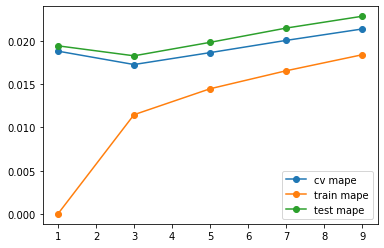

The best k value for cv is 3


In [152]:
plt.plot(k_values,cv_mape_scores,marker="o",label="cv mape")
plt.plot(k_values,train_mape_scores,marker="o",label="train mape")
plt.plot(k_values,test_mape_scores,marker="o",label="test mape")
plt.legend()
plt.show()

best_k = k_values[np.argmin(cv_mape_scores)]
print(f"The best k value for cv is {best_k}")